## MNIST Handwritten Digit Recognition

The MNIST is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem. The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning/deep learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

This is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

We summarize the construction of deep learning models in Keras as follows:

1. **Define model**. Create a sequence and add layers.
2. **Compile model**. Specify loss functions and optimizers.
3. **Fit model**. Execute the model using data.
4. **Make predictions**. Use the model to generate predictions on new data.

In [1]:
# import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

**Load Data**

The Keras library provides a convenience method for loading the MNIST dataset. The dataset is downloaded automatically the first time this function is called and is stored in home directory in ~/.keras/datasets/mnist.pkl.gz as a 15MB file.

In [2]:
# split data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


It appears that there are 60000 images in train data, and the images are 28 pixels x 28 pixels each. We can confirm by plotting first sample:

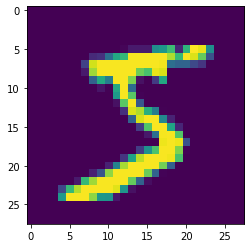

In [6]:
plt.imshow(x_train[0])

The first image is digit 5.

**Process data**

We want to transform our dataset from having shape ```(n, width, height)``` to ```(n, width, height, depth)```.

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

To confirm, we can print X_train's dimensions again:

In [8]:
print (x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


The preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Next, let's take a look at the shape of our class label data:

In [10]:
print (y_train.shape)

(60000,)


We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. 

In [11]:
# convert class vectors to binary class matrices
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Define Model**

In [12]:
batch_size = 128
epochs = 5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Dropout is a method for regularizing our model in order to prevent overfitting.

MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

The weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

**Compile Model**

In [15]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

When we compile the model, we declare the loss function and the optimizer.

**Fit data to Model**

In [16]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1,
                 validation_data=(x_test, y_test))
print("The model has successfully trained")
# saving model
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/5
469/469 [==============================] - 158s 335ms/step - loss: 0.1857 - accuracy: 0.9432 - val_loss: 0.0437 - val_accuracy: 0.9858
Epoch 2/5
469/469 [==============================] - 149s 318ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0369 - val_accuracy: 0.9882
Epoch 3/5
469/469 [==============================] - 176s 375ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 4/5
469/469 [==============================] - 170s 363ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0278 - val_accuracy: 0.9912
Epoch 5/5
469/469 [==============================] - 159s 339ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0290 - val_accuracy: 0.9910
The model has successfully trained
Saving the model as mnist.h5


**Evaluate Model**

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02895411103963852
Test accuracy: 0.9909999966621399


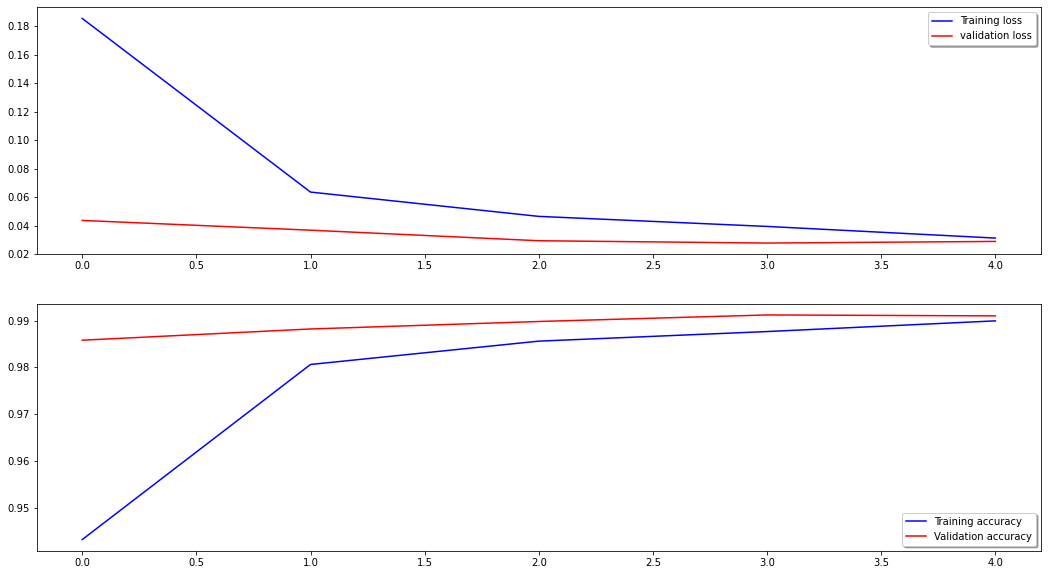

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Make Preictions**

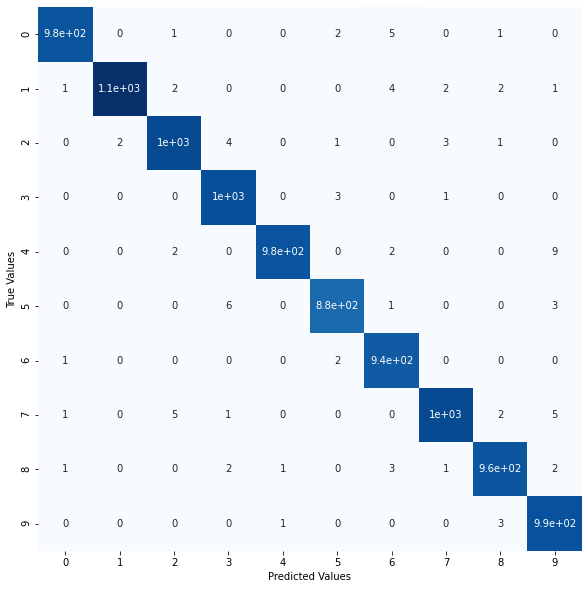

In [19]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

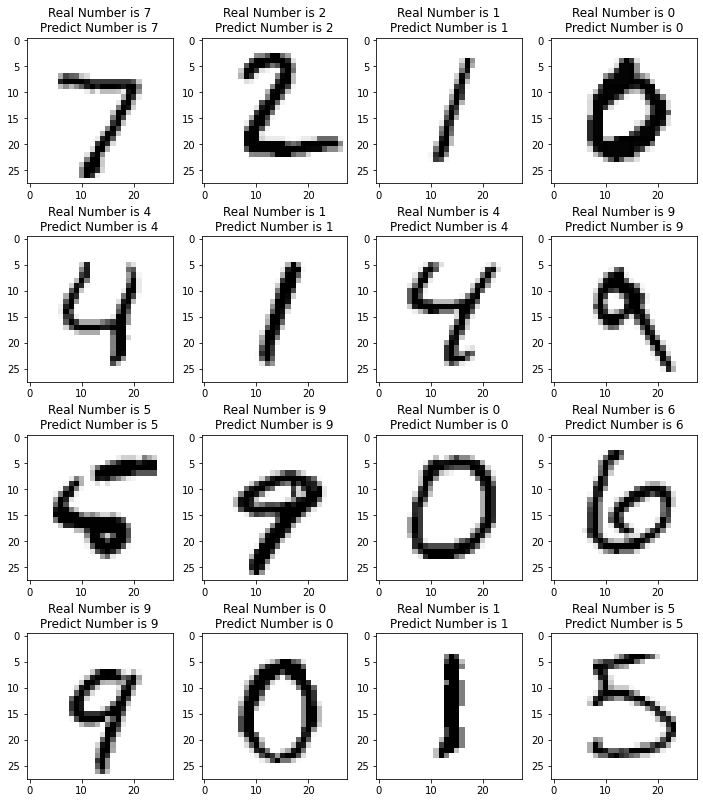

In [20]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");